# Imports

In [13]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [32]:
n = 5
label_name = "stat2"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [33]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [34]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3634589314460754
Epoch 1, Loss 1.3749504685401917
Epoch 2, Loss 1.3597602248191833
Epoch 3, Loss 1.3704127669334412
Epoch 4, Loss 1.380842685699463
Epoch 5, Loss 1.366410732269287
Epoch 6, Loss 1.3726803660392761
Epoch 7, Loss 1.3680928945541382
Epoch 8, Loss 1.35887610912323
Epoch 9, Loss 1.3625481724739075
Epoch 10, Loss 1.338784098625183
Epoch 11, Loss 1.341216504573822
Epoch 12, Loss 1.364074170589447
Epoch 13, Loss 1.3274904489517212
Epoch 14, Loss 1.3328401446342468
Epoch 15, Loss 1.3204430937767029
Epoch 16, Loss 1.3081840872764587
Epoch 17, Loss 1.324429214000702
Epoch 18, Loss 1.3329955339431763
Epoch 19, Loss 1.303746521472931
Epoch 20, Loss 1.315118134021759
Epoch 21, Loss 1.3126267790794373
Epoch 22, Loss 1.3049792051315308
Epoch 23, Loss 1.2863119840621948
Epoch 24, Loss 1.285902976989746
Epoch 25, Loss 1.2941827178001404
Epoch 26, Loss 1.2929155826568604
Epoch 27, Loss 1.2979099750518799
Epoch 28, Loss 1.2708879709243774
Epoch 29, Loss 1.2874809503555298
E

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

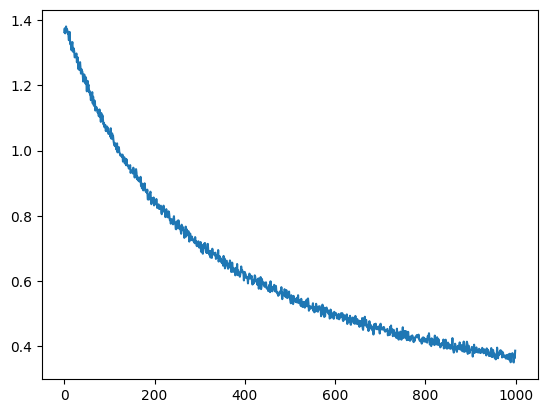

In [35]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

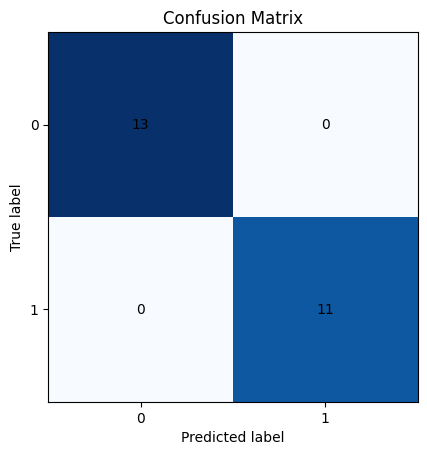

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [36]:
confusion_matrix = evaluate_model(model, test_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

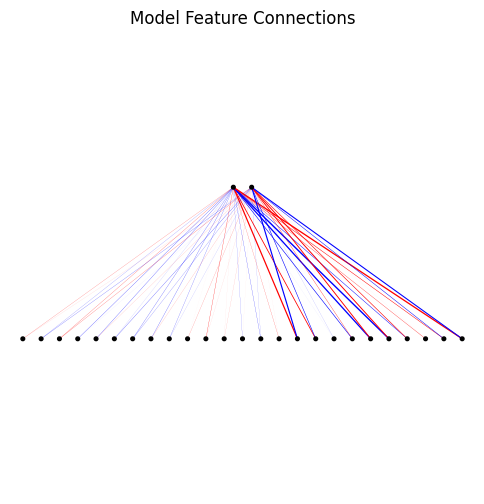

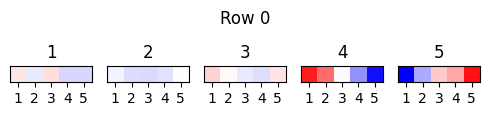

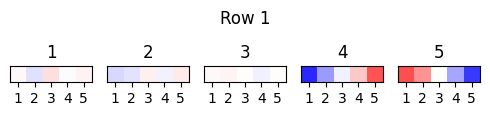

In [37]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)